In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import t

In [11]:
df = pd.read_excel("final.xlsx")
print(df)

                 Timestamp                   Email Address  \
0  2024-03-07 02:22:37.308       sellaptr.sari@dikti.go.id   
1  2024-03-07 14:53:04.414  e41201289@student.polije.ac.id   
2  2024-03-07 14:55:55.627        eggipermana123@gmail.com   
3  2024-03-07 14:57:24.814          fastabikul87@gmail.com   
4  2024-03-07 14:57:44.340           aldobagas24@gmail.com   
..                     ...                             ...   
85 2024-04-02 11:51:17.844                             NaN   
86 2024-04-02 11:51:17.844                             NaN   
87 2024-04-02 11:51:17.844                             NaN   
88 2024-04-02 11:51:17.844                             NaN   
89 2024-04-02 11:51:17.844                             NaN   

                 Nama Lengkap              Jurusan  \
0                      Novita  Teknologi Informasi   
1          Riska Dwi Nur Aini  Teknologi Informasi   
2        eggi permana sunarya  Teknologi Informasi   
3         Fasta Biqul Hoirot   Teknolog

In [12]:
df["total_x1"] = df.iloc[:, 6:14].sum(axis=1)
df["total_x2"] = df.iloc[:, 14:19].sum(axis=1)
df["total_x3"] = df.iloc[:, 19:22].sum(axis=1)
df["total_x4"] = df.iloc[:, 22:24].sum(axis=1)
df["total_y"] = df.iloc[:, 24:26].sum(axis=1)

In [13]:
Xvar = df[['total_x1','total_x2','total_x3','total_x4']]
Xvar = sm.add_constant(Xvar)
Yvar = df['total_y']
olsmod = sm.OLS(Yvar,Xvar).fit()
df['Ypredict'] = round(olsmod.predict(Xvar),4)
df['Residual'] = round(olsmod.resid,4)
print(df)

                 Timestamp                   Email Address  \
0  2024-03-07 02:22:37.308       sellaptr.sari@dikti.go.id   
1  2024-03-07 14:53:04.414  e41201289@student.polije.ac.id   
2  2024-03-07 14:55:55.627        eggipermana123@gmail.com   
3  2024-03-07 14:57:24.814          fastabikul87@gmail.com   
4  2024-03-07 14:57:44.340           aldobagas24@gmail.com   
..                     ...                             ...   
85 2024-04-02 11:51:17.844                             NaN   
86 2024-04-02 11:51:17.844                             NaN   
87 2024-04-02 11:51:17.844                             NaN   
88 2024-04-02 11:51:17.844                             NaN   
89 2024-04-02 11:51:17.844                             NaN   

                 Nama Lengkap              Jurusan  \
0                      Novita  Teknologi Informasi   
1          Riska Dwi Nur Aini  Teknologi Informasi   
2        eggi permana sunarya  Teknologi Informasi   
3         Fasta Biqul Hoirot   Teknolog

In [14]:
# Tampilin
# Normalitas Residual
n_stats, p_val = sm.stats.diagnostic.kstest_normal(
    df['Residual'],dist='norm', pvalmethod='table'
    )
print('P_value Kolmogorov-Smirnov :', round(p_val,3))

if p_val > 0.05:
    print ("Data terdistribusi normal")
elif p_val < 0.05:
    print ("Data terdistribusi tidak normal")

P_value Kolmogorov-Smirnov : 0.033
Data terdistribusi tidak normal


In [15]:
# Tampilin
vif_data = pd.DataFrame()
vif_data["variabel"] = Xvar.columns

# menghitung nilai vif
vif_data["VIF"] = [variance_inflation_factor(Xvar.values,i)for i in range(len(Xvar.columns))]
vif_data['Kesimpulan'] = ['Terjadi multikol' if vif > 10 else 'Tidak terjadi multikol' for vif in vif_data["VIF"]]
vif_data = vif_data.drop(vif_data[vif_data['variabel'] == 'const'].index)
print(vif_data)

   variabel       VIF              Kesimpulan
1  total_x1  2.966763  Tidak terjadi multikol
2  total_x2  3.633018  Tidak terjadi multikol
3  total_x3  2.562533  Tidak terjadi multikol
4  total_x4  2.267638  Tidak terjadi multikol


In [16]:
# Tampilin
# Uji T
print("Uji T untuk variabel independen:")
print("total_x1:", olsmod.tvalues['total_x1'])
print("total_x2:", olsmod.tvalues['total_x2'])
print("total_x3:", olsmod.tvalues['total_x3'])
print("total_x4:", olsmod.tvalues['total_x4'])
print("Constant:", olsmod.tvalues['const'])

total_x1 = olsmod.tvalues['total_x1']
total_x2 = olsmod.tvalues['total_x2']
total_x3 = olsmod.tvalues['total_x3']
total_x4 = olsmod.tvalues['total_x4']
const = olsmod.tvalues['const']


Uji T untuk variabel independen:
total_x1: 0.6427051498772693
total_x2: 0.5875222464585531
total_x3: 2.5657069041951477
total_x4: 3.6911405715275727
Constant: -0.45990862606457916


[Text(0.5, 1.0, 'Predict vs Residual')]

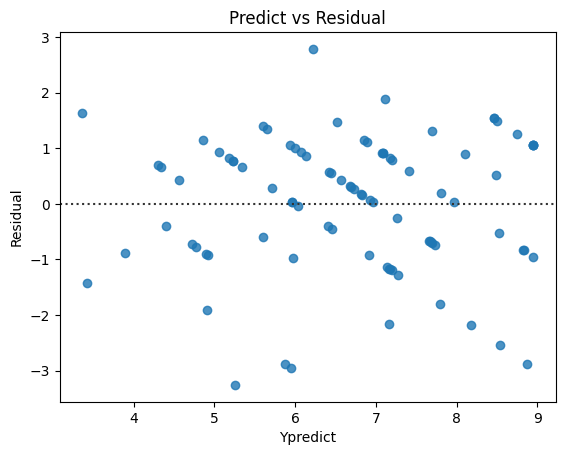

In [17]:
# Tampilin
# Uji Heteroskedastisitas
sns.residplot(x=df["Ypredict"], y=df["Residual"]).set(title='Predict vs Residual')

In [18]:
# Tampilin
# Uji auto korelasi
durbinWatson = durbin_watson(df["Residual"])
print(len(df))
print("Uji Auto Korelasi :", durbinWatson)

# Membaca file Excel
tb_dw = pd.read_excel('tabel_dw.xlsx')

# Menampilkan nilai DL dan DU jika n = 90
n = len(df)
dl_du = tb_dw[tb_dw['n'] == n]
dl_value = dl_du['dl'].values[0]
du_value = dl_du['du'].values[0]

print(f"N = {n} maka DL = {dl_value} dan DU = {du_value}")

if durbinWatson >= du_value and durbinWatson < 4 - du_value:
    print("Tidak terjadi Auto Korelasi")
elif durbinWatson < dl_value and durbinWatson > 4 - dl_value:
    print("Terjadi auto korelasi")

90
Uji Auto Korelasi : 2.219189591202611
N = 90 maka DL = 1.5656 dan DU = 1.7508
Tidak terjadi Auto Korelasi


In [19]:
# Tampilin
# Nilai Linear Regression
bebas = ['total_x1','total_x2','total_x3','total_x4']
X = df[bebas]
y = df['total_y']

model = LinearRegression().fit(X,y)

koefisien = model.coef_
intercept = model.intercept_

print("Intercept : ", intercept)
list(zip(bebas, koefisien))

Intercept :  -0.35727878085269626


[('total_x1', 0.024534670889945973),
 ('total_x2', 0.042175355800537384),
 ('total_x3', 0.20463176763682467),
 ('total_x4', 0.4200973644882937)]

In [20]:
# Uji R Square
r_squared = model.score(X,y)
print("Uji R: ",r_squared)

Uji R:  0.5708521504723221


In [21]:
k = 4
n = len(df)- k

In [22]:
df.to_excel("cobaini.xlsx")

In [23]:
# Tampilin
# Membuat DataFrame untuk tabel uji t
df_t = pd.DataFrame(columns=['dk', 'α=0.05'])
df_t['dk'] = [i for i in range(1, len(df))]

# Menghitung nilai kritis t untuk setiap derajat kebebasan
df_t['α=0.05'] = [round(t.ppf(0.975, df), 3) for df in df_t['dk']]

# Menampilkan tabel uji t
# print(df_t)

# Menampilkan nilai kritis t saat dk = 26
nilai_t = df_t[df_t['dk'] == n]['α=0.05'].values[0]
print("Nilai t tabel dari", n ,"adalah", nilai_t)


Nilai t tabel dari 86 adalah 1.988


In [24]:
if total_x1 > nilai_t:
    print("Nilai total_x1 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x1 tidak berpengaruh pada terhadap Y.")
    
if total_x2 > nilai_t:
    print("Nilai total_x2 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x2 tidak berpengaruh pada terhadap Y.")
    
if total_x3 > nilai_t:
    print("Nilai total_x3 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x3 tidak berpengaruh pada terhadap Y.")
    
if total_x4 > nilai_t:
    print("Nilai total_x4 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x4 tidak berpengaruh pada terhadap Y.")

Nilai total_x1 tidak berpengaruh pada terhadap Y.
Nilai total_x2 tidak berpengaruh pada terhadap Y.
Nilai total_x3 berpengaruh pada terhadap Y.
Nilai total_x4 berpengaruh pada terhadap Y.
